In [1]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
os.chdir("C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python310\\Scripts\\image_processing_UCCC2513")

# SET UP

In [3]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Activity 1

305 354 379 124


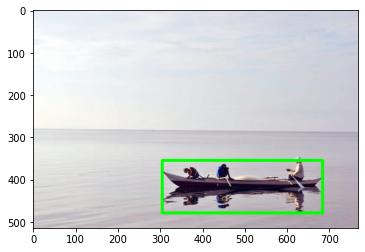

In [4]:
img = cv.imread("boat.jpg")
img_gray = cv.imread("boat.jpg",0)
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
x,y,w,h = cv.boundingRect(mask)
print(x, y, w, h)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(img)

# Activity 2


In [11]:
img = cv.imread("leaf.jfif")
grayscale_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret, th1 = cv.threshold(grayscale_img,0,255,cv.THRESH_BINARY)  #thresholding

def trackbar(x):
    kernel = np.ones((x,x),dtype = np.uint8)
    erosion  = cv.erode(grayscale_img, kernel, iterations = 1)
    dilation = cv.dilate(grayscale_img, kernel, iterations = 1)
    
    opening = cv.morphologyEx(grayscale_img,cv.MORPH_OPEN,kernel)
    closing = cv.morphologyEx(grayscale_img,cv.MORPH_CLOSE,kernel)
    
    cv.imshow('Combine', np.hstack([erosion,dilation,opening,closing]))
    
cv.namedWindow('Combine')
cv.createTrackbar('Value','Combine',1,100,trackbar)
cv.waitKey(0)
cv.destroyAllWindows()

# Activity 3

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

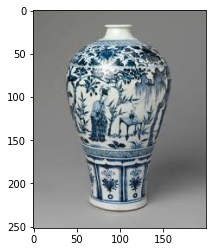

In [14]:
img = cv.imread('porcelain5.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

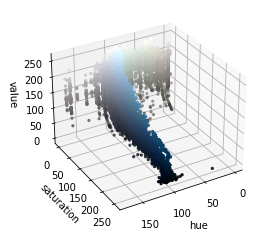

In [16]:
# hsv color space
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")


axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors,
            marker = ".")

axis.view_init(30, 60)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

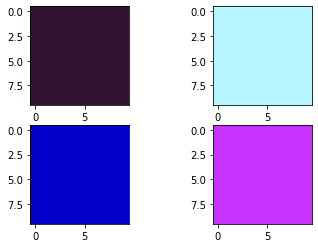

In [17]:
low_blue_value = (50, 20, 50)
high_blue_value = (180, 245, 255)
low_white_value = (0, 0, 200)
high_white_value = (200, 50, 255)

square_light_blue = np.full((10, 10, 3), low_blue_value, dtype = np.uint8)/255.0
square_dark_blue = np.full((10, 10, 3), high_blue_value, dtype = np.uint8)/255.0
square_light_white = np.full((10, 10, 3), low_white_value, dtype = np.uint8)/255.0
square_dark_white = np.full((10, 10, 3), high_white_value, dtype = np.uint8)/255.0

plt.subplot(2, 2, 1)
plt.imshow(square_light_blue)
plt.subplot(2, 2, 2)
plt.imshow(square_dark_blue)
plt.subplot(2, 2, 3)
plt.imshow(square_light_white)
plt.subplot(2, 2, 4)
plt.imshow(square_dark_white)
plt.show()

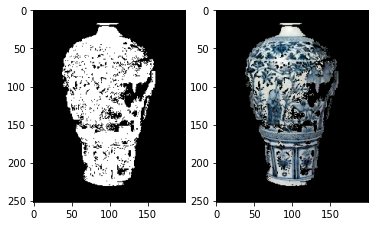

In [18]:
mask = cv.inRange(img_hsv, low_blue_value, high_blue_value)
mask2 = cv.inRange(img_hsv, low_white_value, high_white_value)


combine_mask = cv.bitwise_or(mask, mask2)

res = cv.bitwise_and(img, img, mask = combine_mask)

plt.subplot(1, 2, 1)
plt.imshow(combine_mask, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [22]:
list = []

for i in range(1,6):
    img = cv.imread('porcelain'+str(i)+'.jfif')
    
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    img = cv.resize(img, (200,200), interpolation = cv.INTER_NEAREST)
    list.append(img)
    

mask = cv.inRange(img_hsv, low_blue_value, high_blue_value)
mask2 = cv.inRange(img_hsv, low_white_value, high_white_value)

# Combine the masks
combine_mask = cv.bitwise_or(mask, mask2)
    
result = []

for i in range(0,5):
    img_hsv = cv.cvtColor(list[i], cv.COLOR_RGB2HSV)
    
    res = cv.bitwise_and(img_hsv, img_hsv, mask = combine_mask)
    hsv2rgb = cv.cvtColor(res,cv.COLOR_HSV2RGB)
    result.append(hsv2rgb)


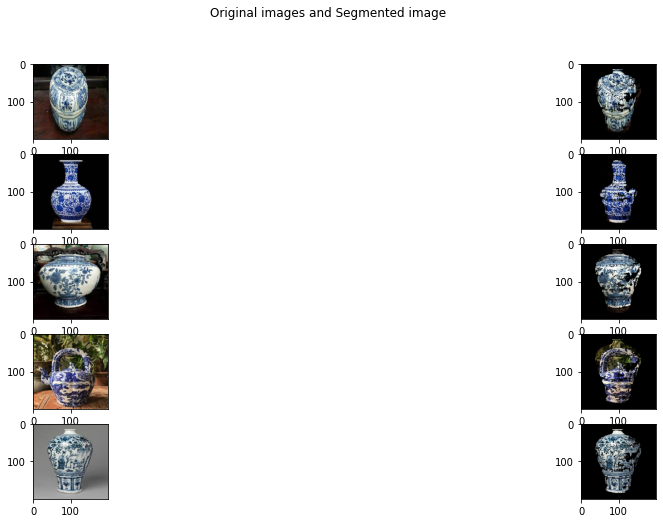

In [24]:
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(list[i])
    ax[i][1].imshow(result[i])

f.suptitle('Original images and Segmented image')
plt.show()